# Building the deferred waterfall from the forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

input_df_dict_long = {'model_dict': model_dict,
                 'billings':df_billings, 
                 'ADBE_cal':df_cal,
                 'bookings': df_bookings,
                 'FX_forwards': df_FX_fwds,
                 'FX_rates': df_FX_rates,
                 'forecast': df_fcst,
                 'final': df
                }

In [2]:
saved_dict = pickle.load( open('../data/processed/final_forecast.p', 'rb'))

In [3]:
saved_dict.keys()

dict_keys(['model_dict', 'ADBE_cal', 'bookings', 'FX_forwards', 'FX_rates', 'final', 'billings', 'forecast', 'initial_waterfall'])

In [4]:
df_waterfall = saved_dict['initial_waterfall']

In [5]:
df_waterfall.head(10)

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Grand inclusive of Magento/Marketo,1.067392e+07,5.274594e+08,5.274594e+08,3.275887e+08,3.275887e+08,3.275887e+08,1.897708e+08,1.897708e+08,1.897708e+08,5.914232e+07,...,6.856067e+06,3085663.85,3085663.85,3085663.85,2.155525e+06,2.155525e+06,2.155525e+06,2.335949e+07,2.335949e+07,2.335949e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [6]:
df_fcst = saved_dict['forecast']

In [7]:
df_fcst.head(10)

,BU,curr,period,recognized_DC,service_DC,deferred_B_DC,deferred_1M_DC,deferred_3M_DC,deferred_6M_DC,deferred_1Y_DC,...,deferred_B_US,deferred_1M_US,deferred_3M_US,deferred_6M_US,deferred_1Y_US,deferred_2Y_US,deferred_3Y_US,book_1Y_DC,book_1Y_US,is_forecast
0,Creative,ARS,2020-07,6786.00,0.0,0.0,2.269996e+07,0.0,0.0,953875.89,...,0.0,311501.652502,0.0,0.0,13089.625145,0.0,0.0,0.0,0.0,1
1,Creative,ARS,2020-08,16472.00,0.0,0.0,2.408421e+07,0.0,0.0,963180.00,...,0.0,313752.445463,0.0,0.0,12547.641949,0.0,0.0,0.0,0.0,1
2,Creative,ARS,2020-09,19205.00,0.0,0.0,3.183559e+07,0.0,0.0,2263704.00,...,0.0,394732.702698,0.0,0.0,28067.897484,0.0,0.0,0.0,0.0,1
3,Creative,ARS,2020-10,30382.19,0.0,0.0,2.685273e+07,0.0,0.0,1318346.81,...,0.0,318570.748470,0.0,0.0,15640.375602,0.0,0.0,0.0,0.0,1
4,Creative,ARS,2020-11,59049.00,0.0,0.0,2.823698e+07,0.0,0.0,1494162.20,...,0.0,321124.778261,0.0,0.0,16992.342903,0.0,0.0,0.0,0.0,1
5,Creative,ARS,2020-12,71355.57,0.0,0.0,3.702655e+07,0.0,0.0,3154860.03,...,0.0,404344.684323,0.0,0.0,34452.328693,0.0,0.0,0.0,0.0,1
6,Creative,ARS,2021-01,79224.95,0.0,0.0,3.875687e+07,0.0,0.0,916705.92,...,0.0,404800.955688,0.0,0.0,9574.648808,0.0,0.0,0.0,0.0,1
7,Creative,ARS,2021-02,36596.00,0.0,0.0,3.238975e+07,0.0,0.0,1337025.94,...,0.0,324175.303733,0.0,0.0,13381.725308,0.0,0.0,0.0,0.0,1
8,Creative,ARS,2021-03,49107.00,0.0,0.0,4.221751e+07,0.0,0.0,2611544.83,...,0.0,405603.786576,0.0,0.0,25090.356687,0.0,0.0,0.0,0.0,1
9,Creative,ARS,2021-04,67878.00,0.0,0.0,3.515827e+07,0.0,0.0,3017041.60,...,0.0,328395.235993,0.0,0.0,28180.628770,0.0,0.0,0.0,0.0,1


# NEED TO DECIDE IF I WANT TO CREATE THE ENTIRE HISTORY OF THE WATERFALL OR NOT

As a check, I should build it historically

- rows are dates, columns are future amounts expected to be amortized
- by currency, BU

Columns
 - total
 - p_1
 - p_2
 - p_3 (etc out 36 months)
 
 - We are taking the USD equivalent and splitting this into the other areas
 
##### Monthly Billings
- 1/2 of the current month + 1/2 of the prior month

##### Annual Billings
- 1/12 of the current annual billings + 11 of the last annual billings + 1/12 of the year prior billings

#### Quarterly

# NOTE: I am ignoring Deferred Type B (Service) billings - for now


In [8]:
# The index is not necessary to create this dataframe

In [9]:
def find_unique_curr_and_BU(df_billings):
    v_BU = df_billings['BU'].copy()
    v_curr = df_billings['curr'].copy()
    v_both = v_BU + v_curr
    v_unique = v_both.unique()

    v_un_BU = [sub[:-3] for sub in v_unique]
    v_un_curr = [sub[-3:] for sub in v_unique]

    return v_un_BU, v_un_curr

### Deferred Revenue Assumptions

##### Monthly Deferred Billings
These occur in the middle of the month. Half the billings go directly to revenue, the remainder amortize out of deferred the next month

##### Three Month Deferred Billings
These are assumed to occur at the end of the period. 

In [10]:
def build_deferred_waterfall(df_billings):
    
    #Finding the unique currencies and BUs to slice the dataframe and build a waterfall for each
    v_un_BU, v_un_curr = find_unique_curr_and_BU(df_billings)
    
    # creating the waterfall list of numeric columns
    wf_columns = ['Total']
    for i in np.arange(36):
        this_column = 'p_'+ str(i+1)
        wf_columns.append(this_column)

    # creating the loop for the individual BU/curr waterfalls
    for i in range(len(v_un_BU)):
        this_BU = v_un_BU[i]
        this_curr = v_un_curr[i]
        
        print('working on BU: {0}  and currency: {1}'.format(this_BU, this_curr))
        this_slice = df_billings[(df_billings['BU']==this_BU) &
                                (df_billings['curr']== this_curr)].copy()
        
        df_this_wf = this_slice[['curr', 'BU', 'period']].copy()
        for item in wf_columns:
            df_this_wf[item] = 0
        
        df_this_wf = build_deferred_waterfall_slice(df_this_wf, this_slice)
        df_this_wf = bring_wf_forward(df_this_wf)
        
        if i == 0:
            df_waterfall = df_this_wf.copy()
        else:
            df_waterfall = pd.concat([df_waterfall, df_this_wf], sort=False)
    df_waterfall.reset_index(drop=True, inplace=True)
    return df_waterfall

In [11]:
def build_deferred_waterfall_slice(df_this_wf, this_slice):
    # Need to add half to the revenue piece
    df_this_wf['p_1'] += this_slice['deferred_1M_US']* 0.5

    # 1/6 goes to revenue in the period it is billed
    df_this_wf['p_1'] += this_slice['deferred_3M_US']* (1/3)
    df_this_wf['p_2'] += this_slice['deferred_3M_US']* (1/3)
    df_this_wf['p_3'] += this_slice['deferred_3M_US']* (1/6)

    # 1/12th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_2'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_3'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_4'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_5'] += this_slice['deferred_6M_US']* (1/6)
    df_this_wf['p_6'] += this_slice['deferred_6M_US']* (1/12)



    # 1/24th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_2'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_3'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_4'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_5'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_6'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_7'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_8'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_9'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_10'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_11'] += this_slice['deferred_1Y_US']* (1/12)
    df_this_wf['p_12'] += this_slice['deferred_1Y_US']* (1/24)

    # 1/24th 1 year bookings
    df_this_wf['p_1'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_2'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_3'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_4'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_5'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_6'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_7'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_8'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_9'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_10'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_11'] += this_slice['book_1Y_US']* (1/12)
    df_this_wf['p_12'] += this_slice['book_1Y_US']* (1/24)

    # Two year
    # 1/48th directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_2'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_3'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_4'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_5'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_6'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_7'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_8'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_9'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_10'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_11'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_12'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_13'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_14'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_15'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_16'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_17'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_18'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_19'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_20'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_21'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_22'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_23'] += this_slice['deferred_2Y_US']* (1/24)
    df_this_wf['p_24'] += this_slice['deferred_2Y_US']* (1/48)

    # Three year
    # 1/72nth directly to revenue
    df_this_wf['p_1'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_2'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_3'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_4'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_5'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_6'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_7'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_8'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_9'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_10'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_11'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_12'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_13'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_14'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_15'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_16'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_17'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_18'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_19'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_20'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_21'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_22'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_23'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_24'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_25'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_26'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_27'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_28'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_29'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_30'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_31'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_32'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_33'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_34'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_35'] += this_slice['deferred_3Y_US']* (1/36)
    df_this_wf['p_36'] += this_slice['deferred_3Y_US']* (1/72)

    return df_this_wf

In [12]:
def bring_wf_forward(df):
    wf_cols_copy = df.columns.str.contains('p_')
    
    df = df.reset_index(drop=True)
    for index, row in df.iterrows():
        
        if index <len(df) - 1:            
            this_row = df.loc[index, wf_cols_copy].to_numpy()            
            this_row = np.delete(this_row, 0)
            this_row = np.append(this_row, [0])           
            df.loc[index+1, wf_cols_copy] += this_row          
            
    return df

In [13]:
df_wf = build_deferred_waterfall(df_fcst)

working on BU: Creative  and currency: ARS
working on BU: DX Other  and currency: ARS
working on BU: Document Cloud  and currency: ARS
working on BU: Experience Cloud  and currency: ARS
working on BU: Print & Publishing  and currency: ARS
working on BU: Creative  and currency: AUD
working on BU: DX Other  and currency: AUD
working on BU: Document Cloud  and currency: AUD
working on BU: Experience Cloud  and currency: AUD
working on BU: Print & Publishing  and currency: AUD
working on BU: Creative  and currency: BRL
working on BU: DX Other  and currency: BRL
working on BU: Document Cloud  and currency: BRL
working on BU: Experience Cloud  and currency: BRL
working on BU: Print & Publishing  and currency: BRL
working on BU: Creative  and currency: CAD
working on BU: DX Other  and currency: CAD
working on BU: Document Cloud  and currency: CAD
working on BU: Experience Cloud  and currency: CAD
working on BU: Print & Publishing  and currency: CAD
working on BU: Creative  and currency: CHF
w

In [14]:
df_wf = df_wf.reset_index(drop=True)

In [15]:
df_wf['BU'] = df_wf['BU'].str.replace('Creative', 'Digital Media')
df_wf['BU'] = df_wf['BU'].str.replace('Document Cloud', 'Digital Media')
df_wf['BU'] = df_wf['BU'].str.replace('DX Other', 'Digital Experience')
df_wf['BU'] = df_wf['BU'].str.replace('Experience Cloud', 'Digital Experience')
df_wf['BU'] = df_wf['BU'].str.replace('Print & Publishing', 'Publishing')


In [16]:
df_wf.head(40)

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
0,ARS,Digital Media,2020-07,0,156841.628346,1090.802095,1090.802095,1090.802095,1090.802095,1090.802095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ARS,Digital Media,2020-08,0,159012.661656,2136.438925,2136.438925,2136.438925,2136.438925,2136.438925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ARS,Digital Media,2020-09,0,201841.781731,4475.430382,4475.430382,4475.430382,4475.430382,4475.430382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARS,Digital Media,2020-10,0,165064.169250,5778.795015,5778.795015,5778.795015,5778.795015,5778.795015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ARS,Digital Media,2020-11,0,167757.212721,7194.823590,7194.823590,7194.823590,7194.823590,7194.823590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ARS,Digital Media,2020-12,0,212238.193143,10065.850981,10065.850981,10065.850981,10065.850981,10065.850981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ARS,Digital Media,2021-01,0,213264.216226,10863.738382,10863.738382,10863.738382,10863.738382,10318.337334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ARS,Digital Media,2021-02,0,174066.534024,11978.882158,11978.882158,11978.882158,11433.481110,10365.261648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ARS,Digital Media,2021-03,0,216871.638503,14069.745215,14069.745215,13524.344167,12456.124705,10763.810562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ARS,Digital Media,2021-04,0,180615.748942,16418.130946,15872.729898,14804.510436,13112.196293,11291.018248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
this_curr = 'EUR'
this_BU = 'Digital Experience'
this_slice = df_wf[(df_wf['BU']== this_BU)&
                  (df_wf['curr']==this_curr)]
                   

In [18]:
this_slice

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
492,EUR,Digital Experience,2020-07,0,3.836487e+04,3.680316e+04,3.680316e+04,3.680316e+04,3.680316e+04,3.680316e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
493,EUR,Digital Experience,2020-08,0,3.840393e+04,3.680316e+04,3.680316e+04,3.680316e+04,3.680316e+04,3.680316e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
494,EUR,Digital Experience,2020-09,0,4.897190e+04,4.692205e+04,4.692205e+04,4.692205e+04,4.692205e+04,4.692205e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
495,EUR,Digital Experience,2020-10,0,5.241903e+04,5.073999e+04,5.073999e+04,5.073999e+04,5.073999e+04,5.073999e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
496,EUR,Digital Experience,2020-11,0,5.799178e+04,5.627353e+04,5.627353e+04,5.627353e+04,5.627353e+04,5.627353e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
497,EUR,Digital Experience,2020-12,0,6.443938e+04,6.224249e+04,6.224249e+04,6.224249e+04,6.224249e+04,6.224249e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
498,EUR,Digital Experience,2021-01,0,6.831504e+04,6.606873e+04,6.606873e+04,6.606873e+04,6.606873e+04,4.766714e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
499,EUR,Digital Experience,2021-02,0,6.928493e+04,6.744828e+04,6.744828e+04,6.744828e+04,4.904670e+04,3.064511e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
500,EUR,Digital Experience,2021-03,0,7.315649e+04,7.081110e+04,7.081110e+04,5.240951e+04,3.400793e+04,2.894849e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
501,EUR,Digital Experience,2021-04,0,7.926405e+04,7.734820e+04,5.894662e+04,4.054504e+04,3.548560e+04,2.851718e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
this_curr = 'EUR'
this_BU = 'DX Other'
DX_slice = df_wf[(df_wf['BU']== this_BU)&
                  (df_wf['curr']==this_curr)]
                   

In [20]:
DX_slice

,curr,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36


In [21]:
df_wf['p_27'].sum()

108440.13693087082

In [22]:
df_wf['p_27'].describe()

count    1620.000000
mean       66.938356
std       575.614567
min      -138.888889
25%         0.000000
50%         0.000000
75%         0.000000
max      9287.326389
Name: p_27, dtype: float64

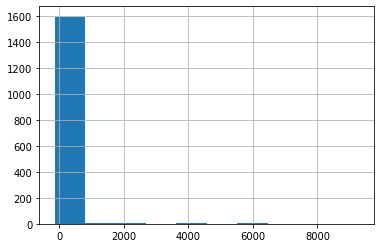

In [23]:
df_wf['p_27'].hist()

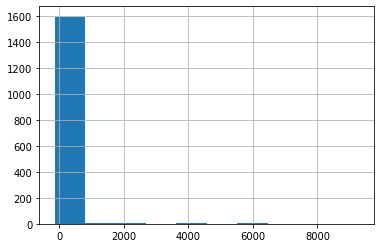

In [24]:
df_wf['p_27'].hist()

In [25]:
df_wf['p_27'].sum()

108440.13693087082

### So I have the deferred waterfall by DC, period, BU.
# I need to groupby BU and Period

In [26]:
df_wf_gb = df_wf.groupby(['BU', 'period']).sum()

In [27]:
df_wf_gb['p_27'].sum()

108440.13693087081

In [28]:
df_wf_gb.head(40)

Total           p_1           p_2           p_3  \
BU                 period                                                     
Digital Experience 2020-07      0  1.924433e+07  1.845621e+07  1.344284e+07   
                   2020-08      0  3.086740e+07  2.516473e+07  1.765427e+07   
                   2020-09      0  4.432611e+07  3.607755e+07  3.073152e+07   
                   2020-10      0  5.853854e+07  5.270085e+07  4.455251e+07   
                   2020-11      0  6.852213e+07  5.998098e+07  5.196107e+07   
                   2020-12      0  8.098708e+07  7.259971e+07  6.678826e+07   
                   2021-01      0  9.517597e+07  8.912060e+07  8.088090e+07   
                   2021-02      0  1.081790e+08  9.984300e+07  9.210851e+07   
                   2021-03      0  1.160307e+08  1.082994e+08  1.026679e+08   
                   2021-04      0  1.283925e+08  1.228624e+08  1.105834e+08   
                   2021-05      0  1.343377e+08  1.222589e+08  1.071600e+08   
                   2021-06      0  1.330057e+08  1.182808e+08  1.032006e+08   
Digital Media      2020-07      0  1.869129e+08  2.742961e+07  2.709471e+07   
                   2020-08      0  2.142820e+08  5.207949e+07  5.172939e+07   
                   2020-09      0  2.982570e+08  9.259100e+07  9.255051e+07   
                   2020-10      0  2.887141e+08  1.220385e+08  1.215995e+08   
                   2020-11      0  3.220791e+08  1.526222e+08  1.521779e+08   
                   2020-12      0  4.188159e+08  2.041205e+08  2.040430e+08   
                   2021-01      0  4.499130e+08  2.325960e+08  2.321973e+08   
                   2021-02      0  4.308878e+08  2.543063e+08  2.539387e+08   
                   2021-03      0  5.112340e+08  2.876480e+08  2.876058e+08   
                   2021-04      0  4.920599e+08  3.112991e+08  2.975727e+08   
                   2021-05      0  5.139072e+08  3.170876e+08  2.909136e+08   
                   2021-06      0  5.746602e+08  3.166509e+08  2.837689e+08   
Publishing         2020-07      0  1.164495e+06  9.179430e+05  8.988124e+05   
                   2020-08      0  1.906237e+06  1.642183e+06  1.587560e+06   
                   2020-09      0  3.640469e+06  3.281729e+06  3.245438e+06   
                   2020-10      0  4.654886e+06  4.376930e+06  4.356671e+06   
                   2020-11      0  5.634580e+06  5.374286e+06  5.317958e+06   
                   2020-12      0  7.221028e+06  6.866692e+06  6.828973e+06   
                   2021-01      0  7.806529e+06  7.472827e+06  7.452842e+06   
                   2021-02      0  8.405221e+06  8.150069e+06  8.095207e+06   
                   2021-03      0  9.496489e+06  9.149693e+06  9.106735e+06   
                   2021-04      0  1.020459e+07  9.929717e+06  9.465354e+06   
                   2021-05      0  1.112735e+07  1.043269e+07  9.605309e+06   
                   2021-06      0  1.204235e+07  1.092914e+07  9.714150e+06   

                                     p_4           p_5           p_6  \
BU                 period                                              
Digital Experience 2020-07  8.429474e+06  8.429474e+06  8.144972e+06   
                   2020-08  1.515717e+07  1.487267e+07  1.436613e+07   
                   2020-09  2.759808e+07  2.709153e+07  2.662829e+07   
                   2020-10  3.903107e+07  3.856783e+07  3.819438e+07   
                   2020-11  4.899936e+07  4.862592e+07  4.840793e+07   
                   2020-12  6.356506e+07  6.334707e+07  6.306634e+07   
                   2021-01  7.564641e+07  7.536568e+07  7.095558e+07   
                   2021-02  8.932777e+07  8.491767e+07  7.733839e+07   
                   2021-03  9.540702e+07  8.782774e+07  7.810056e+07   
                   2021-04  9.798586e+07  8.825867e+07  7.592595e+07   
                   2021-05  9.493135e+07  8.259863e+07  7.141658e+07   
                   2021-06  8.801628e+07  7.683424e+07  6.415207e+07   
Digital Media    

### Now we need to group the BU to match the waterfall BUs

In [29]:
df_wf_gb.index

MultiIndex([('Digital Experience', '2020-07'),
            ('Digital Experience', '2020-08'),
            ('Digital Experience', '2020-09'),
            ('Digital Experience', '2020-10'),
            ('Digital Experience', '2020-11'),
            ('Digital Experience', '2020-12'),
            ('Digital Experience', '2021-01'),
            ('Digital Experience', '2021-02'),
            ('Digital Experience', '2021-03'),
            ('Digital Experience', '2021-04'),
            ('Digital Experience', '2021-05'),
            ('Digital Experience', '2021-06'),
            (     'Digital Media', '2020-07'),
            (     'Digital Media', '2020-08'),
            (     'Digital Media', '2020-09'),
            (     'Digital Media', '2020-10'),
            (     'Digital Media', '2020-11'),
            (     'Digital Media', '2020-12'),
            (     'Digital Media', '2021-01'),
            (     'Digital Media', '2021-02'),
            (     'Digital Media', '2021-03'),
            (

In [30]:
df_waterfall

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Grand inclusive of Magento/Marketo,1.067392e+07,5.274594e+08,5.274594e+08,3.275887e+08,3.275887e+08,3.275887e+08,1.897708e+08,1.897708e+08,1.897708e+08,5.914232e+07,...,6.856067e+06,3085663.85,3085663.85,3085663.85,2.155525e+06,2.155525e+06,2.155525e+06,2.335949e+07,2.335949e+07,2.335949e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [31]:
df_wf_gb.reset_index(inplace=True)

In [32]:
df_wf_gb.head(5)

,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,p_7,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
0,Digital Experience,2020-07,0,1.924433e+07,1.845621e+07,1.344284e+07,8.429474e+06,8.429474e+06,8.144972e+06,7.860470e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Digital Experience,2020-08,0,3.086740e+07,2.516473e+07,1.765427e+07,1.515717e+07,1.487267e+07,1.436613e+07,1.414409e+07,...,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,60.993143
2,Digital Experience,2020-09,0,4.432611e+07,3.607755e+07,3.073152e+07,2.759808e+07,2.709153e+07,2.662829e+07,2.638709e+07,...,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,27.698379,-16.647382
3,Digital Experience,2020-10,0,5.853854e+07,5.270085e+07,4.455251e+07,3.903107e+07,3.856783e+07,3.819438e+07,3.806214e+07,...,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,619.889167,575.543407,296.095394
4,Digital Experience,2020-11,0,6.852213e+07,5.998098e+07,5.196107e+07,4.899936e+07,4.862592e+07,4.840793e+07,4.832218e+07,...,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7399.366505,7355.020744,7075.572732,3389.738669


### Change the BU to match the waterfall BUs
 - Creative to Digital Media
 - Document Cloud to Digital Media
 - Print & Publishing to Publishing
 - DX Other to Digital Experience
 - Experience Cloud to Digital Experience

In [33]:
new_slice = df_wf_gb[df_wf_gb['BU']=='Digital Experience']

In [34]:
new_slice

,BU,period,Total,p_1,p_2,p_3,p_4,p_5,p_6,p_7,...,p_27,p_28,p_29,p_30,p_31,p_32,p_33,p_34,p_35,p_36
0,Digital Experience,2020-07,0,1.924433e+07,1.845621e+07,1.344284e+07,8.429474e+06,8.429474e+06,8.144972e+06,7.860470e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Digital Experience,2020-08,0,3.086740e+07,2.516473e+07,1.765427e+07,1.515717e+07,1.487267e+07,1.436613e+07,1.414409e+07,...,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,60.993143
2,Digital Experience,2020-09,0,4.432611e+07,3.607755e+07,3.073152e+07,2.759808e+07,2.709153e+07,2.662829e+07,2.638709e+07,...,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,27.698379,-16.647382
3,Digital Experience,2020-10,0,5.853854e+07,5.270085e+07,4.455251e+07,3.903107e+07,3.856783e+07,3.819438e+07,3.806214e+07,...,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,619.889167,575.543407,296.095394
4,Digital Experience,2020-11,0,6.852213e+07,5.998098e+07,5.196107e+07,4.899936e+07,4.862592e+07,4.840793e+07,4.832218e+07,...,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7399.366505,7355.020744,7075.572732,3389.738669
5,Digital Experience,2020-12,0,8.098708e+07,7.259971e+07,6.678826e+07,6.356506e+07,6.334707e+07,6.306634e+07,5.894112e+07,...,7497.054093,7497.054093,7497.054093,7497.054093,7497.054093,7436.060950,7391.715189,7112.267177,3426.433113,18.347222
6,Digital Experience,2021-01,0,9.517597e+07,8.912060e+07,8.088090e+07,7.564641e+07,7.536568e+07,7.095558e+07,6.359871e+07,...,7875.776315,7875.776315,7875.776315,7875.776315,7814.783172,7770.437411,7490.989399,3805.155336,397.069444,189.361111
7,Digital Experience,2021-02,0,1.081790e+08,9.984300e+07,9.210851e+07,8.932777e+07,8.491767e+07,7.733839e+07,6.785272e+07,...,11232.595482,11232.595482,11232.595482,11171.602339,11127.256578,10847.808566,7161.974502,3753.888611,3546.180278,1678.409583
8,Digital Experience,2021-03,0,1.160307e+08,1.082994e+08,1.026679e+08,9.540702e+07,8.782774e+07,7.810056e+07,6.590031e+07,...,8025.593167,8025.593167,7964.600024,7920.254263,7640.806251,3954.972187,546.886296,339.177963,-1528.592731,-1603.501157
9,Digital Experience,2021-04,0,1.283925e+08,1.228624e+08,1.105834e+08,9.798586e+07,8.825867e+07,7.592595e+07,6.482962e+07,...,8025.593167,7964.600024,7920.254263,7640.806251,3954.972187,546.886296,339.177963,-1528.592731,-1603.501157,0.000000


### The problem is here!
We have a sum problem with digital experience



In [35]:
#df_wf_gb2 = df_wf_gb.groupby(['BU', 'period']).sum()

In [36]:
#df_wf_gb2

## Altering the initial waterfall fields

In [37]:
df_waterfall

,As Performed / Upon Acceptance,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,5.072172e+06,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,5.601745e+06,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Grand inclusive of Magento/Marketo,1.067392e+07,5.274594e+08,5.274594e+08,3.275887e+08,3.275887e+08,3.275887e+08,1.897708e+08,1.897708e+08,1.897708e+08,5.914232e+07,...,6.856067e+06,3085663.85,3085663.85,3085663.85,2.155525e+06,2.155525e+06,2.155525e+06,2.335949e+07,2.335949e+07,2.335949e+07
Publishing,0.000000e+00,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [38]:
df_waterfall.drop('Grand inclusive of Magento/Marketo', inplace=True)

## Take the As Performed / Upon Acceptance column and place this into the df_wf_gb dataframe.
## We will assume that this does not change over time 

In [39]:
df_as_performed = df_waterfall['As Performed / Upon Acceptance'].copy()


In [40]:
df_as_performed

External Reporting BU
Digital Experience    5.072172e+06
Digital Media         5.601745e+06
Publishing            0.000000e+00
Name: As Performed / Upon Acceptance, dtype: float64

In [41]:
df_waterfall = df_waterfall.drop('As Performed / Upon Acceptance', axis=1)

In [42]:
df_waterfall

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


## Changing the periods in the df_wf_gb to match the df_watefall first

In [43]:
old_cols = df_wf_gb.columns
old_cols = old_cols[3:]

In [44]:
new_columns = []
for i in range(12*3):
    if len(str(i+1))==1:
        new_column = 'P0'+ str(i+1)
    else:
        new_column = 'P'+ str(i+1)
    new_columns.append(new_column)

In [45]:
rename_dict = dict(zip(old_cols, new_columns))
df_wf_gb = df_wf_gb.rename(columns=rename_dict)


In [46]:
df_wf_gb

,BU,period,Total,P01,P02,P03,P04,P05,P06,P07,...,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Experience,2020-07,0,1.924433e+07,1.845621e+07,1.344284e+07,8.429474e+06,8.429474e+06,8.144972e+06,7.860470e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Digital Experience,2020-08,0,3.086740e+07,2.516473e+07,1.765427e+07,1.515717e+07,1.487267e+07,1.436613e+07,1.414409e+07,...,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,121.986287,60.993143
2,Digital Experience,2020-09,0,4.432611e+07,3.607755e+07,3.073152e+07,2.759808e+07,2.709153e+07,2.662829e+07,2.638709e+07,...,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,88.691522,27.698379,-16.647382
3,Digital Experience,2020-10,0,5.853854e+07,5.270085e+07,4.455251e+07,3.903107e+07,3.856783e+07,3.819438e+07,3.806214e+07,...,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,680.882311,619.889167,575.543407,296.095394
4,Digital Experience,2020-11,0,6.852213e+07,5.998098e+07,5.196107e+07,4.899936e+07,4.862592e+07,4.840793e+07,4.832218e+07,...,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7460.359649,7399.366505,7355.020744,7075.572732,3389.738669
5,Digital Experience,2020-12,0,8.098708e+07,7.259971e+07,6.678826e+07,6.356506e+07,6.334707e+07,6.306634e+07,5.894112e+07,...,7497.054093,7497.054093,7497.054093,7497.054093,7497.054093,7436.060950,7391.715189,7112.267177,3426.433113,18.347222
6,Digital Experience,2021-01,0,9.517597e+07,8.912060e+07,8.088090e+07,7.564641e+07,7.536568e+07,7.095558e+07,6.359871e+07,...,7875.776315,7875.776315,7875.776315,7875.776315,7814.783172,7770.437411,7490.989399,3805.155336,397.069444,189.361111
7,Digital Experience,2021-02,0,1.081790e+08,9.984300e+07,9.210851e+07,8.932777e+07,8.491767e+07,7.733839e+07,6.785272e+07,...,11232.595482,11232.595482,11232.595482,11171.602339,11127.256578,10847.808566,7161.974502,3753.888611,3546.180278,1678.409583
8,Digital Experience,2021-03,0,1.160307e+08,1.082994e+08,1.026679e+08,9.540702e+07,8.782774e+07,7.810056e+07,6.590031e+07,...,8025.593167,8025.593167,7964.600024,7920.254263,7640.806251,3954.972187,546.886296,339.177963,-1528.592731,-1603.501157
9,Digital Experience,2021-04,0,1.283925e+08,1.228624e+08,1.105834e+08,9.798586e+07,8.825867e+07,7.592595e+07,6.482962e+07,...,8025.593167,7964.600024,7920.254263,7640.806251,3954.972187,546.886296,339.177963,-1528.592731,-1603.501157,0.000000


In [47]:
list_periods = df_wf_gb.period.unique()
list_periods

array(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'],
      dtype=object)

In [48]:
df_waterfall

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,...,3.813405e+06,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06
Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,4.023382e+07,...,2.773333e+06,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07
Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,1.779139e+06,...,2.693293e+05,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04


In [49]:
list_BU = df_wf_gb.BU.unique()

In [50]:
list_BU


array(['Digital Experience', 'Digital Media', 'Publishing'], dtype=object)

In [51]:
df_waterfall['period'] = '2020-07'
df_waterfall

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,period
External Reporting BU,,,,,,,,,,,,,,,,,,,,,
Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,...,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06,2020-07
Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,4.023382e+07,...,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07,2020-07
Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,1.779139e+06,...,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04,2020-07


In [52]:
df_waterfall=df_waterfall.reset_index()
df_waterfall

,External Reporting BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,period
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06,2020-07
1,Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07,2020-07
2,Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04,2020-07


In [53]:
df_waterfall.rename(columns={'External Reporting BU': 'BU'}, inplace=True)
df_waterfall

,BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,P18,P19,P20,P21,P22,P23,P24,P25,P26,period
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,1162279.85,1162279.85,1162279.85,8.226450e+05,8.226450e+05,8.226450e+05,1.672184e+06,1.672184e+06,1.672184e+06,2020-07
1,Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,1807709.00,1807709.00,1807709.00,1.288270e+06,1.288270e+06,1.288270e+06,2.164146e+07,2.164146e+07,2.164146e+07,2020-07
2,Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,115675.00,115675.00,115675.00,4.461067e+04,4.461067e+04,4.461067e+04,4.584667e+04,4.584667e+04,4.584667e+04,2020-07


## ADDING ADDITONAL PERIODS HERE TO MERGE WITH df_wf

In [54]:
df_waterfall['P28'] = 0
df_waterfall['P29'] = 0
df_waterfall['P30'] = 0
df_waterfall['P31'] = 0
df_waterfall['P32'] = 0
df_waterfall['P33'] = 0
df_waterfall['P34'] = 0
df_waterfall['P35'] = 0
df_waterfall['P36'] = 0


In [55]:
df_waterfall.head(10)

,BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,period,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,2020-07,0,0,0,0,0,0,0,0,0
1,Digital Media,3.506325e+08,3.506325e+08,2.191780e+08,2.191780e+08,2.191780e+08,1.279252e+08,1.279252e+08,1.279252e+08,4.023382e+07,...,2020-07,0,0,0,0,0,0,0,0,0
2,Publishing,1.033243e+07,1.033243e+07,6.642776e+06,6.642776e+06,6.642776e+06,3.904775e+06,3.904775e+06,3.904775e+06,1.779139e+06,...,2020-07,0,0,0,0,0,0,0,0,0


##### Planning on making a new datagframe with BU and period and merging them. Will create NAs everywhere else, but we will fillna

In [56]:
list_periods =list_periods[1:]
list_periods

array(['2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'],
      dtype=object)

In [57]:
list_BU

array(['Digital Experience', 'Digital Media', 'Publishing'], dtype=object)

In [58]:
to_df_BU = []
to_df_period = []
for item in list_BU:
    
    for per in list_periods:
        to_df_BU.append(item)
        to_df_period.append(per)

In [59]:
len(to_df_BU)

33

### Creating new dataframe to be merged

In [60]:
df_to_merge = pd.DataFrame({'BU': to_df_BU, 'period': to_df_period})

In [61]:
df_waterfall = df_waterfall.merge(df_to_merge, on=['BU', 'period'], how='outer')

In [62]:
df_waterfall.fillna(0, inplace=True)

In [63]:
df_waterfall.sort_values(by = ['BU', 'period'], inplace=True)

In [64]:
df_waterfall

,BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,period,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,2020-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2020-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2021-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2021-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2021-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Digital Experience,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2021-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Now move the waterfall forward by BU

In [65]:
def bring_slice_wf_forward(df):
    wf_cols_copy = df.columns[df.columns.str.contains('P')]
    print(wf_cols_copy)
    df = df.reset_index(drop=True)
    for index, row in df.iterrows():
    
        if index <len(df) - 1:            
            this_row = df.loc[index, wf_cols_copy].to_numpy()            
            this_row = np.delete(this_row, 0)
            this_row = np.append(this_row, [0])           
            df.loc[index+1, wf_cols_copy] += this_row          
            
    return df

In [66]:
def bring_initial_wf_forward(df_waterfall):
    
    
    list_BU = df_waterfall['BU'].unique()
    
    
    for i in range(len(list_BU)):    
        this_BU = list_BU[i]
        this_slice = df_waterfall[df_waterfall['BU']==this_BU].copy()
        
        
        df_this_wf = bring_slice_wf_forward(this_slice)
        
        if i == 0:
            df_wf = df_this_wf.copy()
        else:
            df_wf = pd.concat([df_wf, df_this_wf], sort=False)
        
    df_wf.reset_index(drop=True, inplace=True)
    return df_wf


In [67]:
df_waterfall = bring_initial_wf_forward(df_waterfall)

Index(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')
Index(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')
Index(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')


In [68]:
df_waterfall

,BU,P01,P02,P03,P04,P05,P06,P07,P08,P09,...,period,P28,P29,P30,P31,P32,P33,P34,P35,P36
0,Digital Experience,1.664945e+08,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,...,2020-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Digital Experience,1.664945e+08,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,...,2020-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Digital Experience,1.017679e+08,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,...,2020-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Digital Experience,1.017679e+08,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,...,2020-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Digital Experience,1.017679e+08,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,...,2020-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Digital Experience,5.794085e+07,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,...,2020-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Digital Experience,5.794085e+07,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,3.813405e+06,...,2021-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Digital Experience,5.794085e+07,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,3.813405e+06,3.813405e+06,...,2021-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Digital Experience,1.712937e+07,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,3.813405e+06,3.813405e+06,3.813405e+06,...,2021-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Digital Experience,1.712937e+07,1.712937e+07,5.578098e+06,5.578098e+06,5.578098e+06,3.813405e+06,3.813405e+06,3.813405e+06,1.162280e+06,...,2021-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df_wf_gb.columns


Index(['BU', 'period', 'Total', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06',
       'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')

In [70]:
df_waterfall.columns

Index(['BU', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'period', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')

In [71]:
df_waterfall = df_waterfall.set_index(['BU', 'period'])

In [72]:
df_wf_gb = df_wf_gb.set_index(['BU', 'period'])

In [73]:
df_all = df_waterfall.add(df_wf_gb, fill_value=0)

In [74]:
df_waterfall = df_waterfall.sort_index()
df_all = df_all.sort_index()
df_wf_gb = df_wf_gb.sort_index()

In [75]:
df_all.head(40)

P01           P02           P03  \
BU                 period                                              
Digital Experience 2020-07  1.857388e+08  1.849507e+08  1.152108e+08   
                   2020-08  1.973619e+08  1.269326e+08  1.194222e+08   
                   2020-09  1.460940e+08  1.378455e+08  1.324994e+08   
                   2020-10  1.603065e+08  1.544688e+08  1.024934e+08   
                   2020-11  1.702900e+08  1.179218e+08  1.099019e+08   
                   2020-12  1.389279e+08  1.305406e+08  1.247291e+08   
                   2021-01  1.531168e+08  1.470614e+08  9.801027e+07   
                   2021-02  1.661198e+08  1.169724e+08  1.092379e+08   
                   2021-03  1.331600e+08  1.254287e+08  1.197972e+08   
                   2021-04  1.455219e+08  1.399918e+08  1.161615e+08   
                   2021-05  1.514670e+08  1.278370e+08  1.127381e+08   
                   2021-06  1.385838e+08  1.238589e+08  1.087787e+08   
Digital Media      2020-07  5.375454e+08  3.780621e+08  2.462727e+08   
                   2020-08  5.649146e+08  2.712575e+08  2.709074e+08   
                   2020-09  5.174350e+08  3.117690e+08  3.117285e+08   
                   2020-10  5.078921e+08  3.412165e+08  2.495247e+08   
                   2020-11  5.412571e+08  2.805474e+08  2.801031e+08   
                   2020-12  5.467411e+08  3.320457e+08  3.319682e+08   
                   2021-01  5.778382e+08  3.605212e+08  2.724311e+08   
                   2021-02  5.588130e+08  2.945401e+08  2.941725e+08   
                   2021-03  5.514679e+08  3.278818e+08  3.278396e+08   
                   2021-04  5.322937e+08  3.515329e+08  3.015475e+08   
                   2021-05  5.541411e+08  3.210623e+08  2.948883e+08   
                   2021-06  5.786349e+08  3.206256e+08  2.877436e+08   
Publishing         2020-07  1.149692e+07  1.125037e+07  7.541589e+06   
                   2020-08  1.223866e+07  8.284959e+06  8.230336e+06   
                   2020-09  1.028325e+07  9.924505e+06  9.888214e+06   
                   2020-10  1.129766e+07  1.101971e+07  8.261446e+06   
                   2020-11  1.227736e+07  9.279061e+06  9.222733e+06   
                   2020-12  1.112580e+07  1.077147e+07  1.073375e+07   
                   2021-01  1.171130e+07  1.137760e+07  9.231981e+06   
                   2021-02  1.231000e+07  9.929208e+06  9.874346e+06   
                   2021-03  1.127563e+07  1.092883e+07  1.088587e+07   
                   2021-04  1.198373e+07  1.170886e+07  1.055885e+07   
                   2021-05  1.290649e+07  1.152619e+07  1.069880e+07   
                   2021-06  1.313585e+07  1.202263e+07  1.080765e+07   

                                     P04           P05           P06  \
BU                 period                                              
Digital Experience 2020-07  1.101974e+08  1.101974e+08  6.608582e+07   
                   2020-08  1.169251e+08  7.281352e+07  7.230698e+07   
                   2020-09  8.553893e+07  8.503238e+07  8.456914e+07   
                   2020-10  9.697192e+07  9.650868e+07  5.532375e+07   
                   2020-11  1.069402e+08  6.575528e+07  6.553730e+07   
                   2020-12  8.069443e+07  8.047644e+07  8.019571e+07   
                   2021-01  9.277577e+07  9.249504e+07  7.653367e+07   
                   2021-02  1.064571e+08  9.049577e+07  8.291649e+07   
                   2021-03  1.009851e+08  9.340584e+07  8.367866e+07   
                   2021-04  1.035640e+08  9.383677e+07  7.973935e+07   
                   2021-05  1.005094e+08  8.641203e+07  7.522999e+07   
                   2021-06  9.182969e+07  8.064764e+07  6.796547e+07   
Digital Media      2020-07  2.459378e+08  2.459378e+08  1.546063e+08   
                   2020-08  2.708922e+08  1.795607e+08  1.794666e+08   
                   2020-09  2.203718e+08  2.202777e+08  2.202406e+08   
                   2020-10  2.490955e+08  2.490585e+08  1.613289e+08   
    

In [76]:
df_wf_gb.head(10)

Total           P01           P02           P03  \
BU                 period                                                     
Digital Experience 2020-07      0  1.924433e+07  1.845621e+07  1.344284e+07   
                   2020-08      0  3.086740e+07  2.516473e+07  1.765427e+07   
                   2020-09      0  4.432611e+07  3.607755e+07  3.073152e+07   
                   2020-10      0  5.853854e+07  5.270085e+07  4.455251e+07   
                   2020-11      0  6.852213e+07  5.998098e+07  5.196107e+07   
                   2020-12      0  8.098708e+07  7.259971e+07  6.678826e+07   
                   2021-01      0  9.517597e+07  8.912060e+07  8.088090e+07   
                   2021-02      0  1.081790e+08  9.984300e+07  9.210851e+07   
                   2021-03      0  1.160307e+08  1.082994e+08  1.026679e+08   
                   2021-04      0  1.283925e+08  1.228624e+08  1.105834e+08   

                                     P04           P05           P06  \
BU                 period                                              
Digital Experience 2020-07  8.429474e+06  8.429474e+06  8.144972e+06   
                   2020-08  1.515717e+07  1.487267e+07  1.436613e+07   
                   2020-09  2.759808e+07  2.709153e+07  2.662829e+07   
                   2020-10  3.903107e+07  3.856783e+07  3.819438e+07   
                   2020-11  4.899936e+07  4.862592e+07  4.840793e+07   
                   2020-12  6.356506e+07  6.334707e+07  6.306634e+07   
                   2021-01  7.564641e+07  7.536568e+07  7.095558e+07   
                   2021-02  8.932777e+07  8.491767e+07  7.733839e+07   
                   2021-03  9.540702e+07  8.782774e+07  7.810056e+07   
                   2021-04  9.798586e+07  8.825867e+07  7.592595e+07   

                                     P07           P08           P09  ...  \
BU                 period                                             ...   
Digital Experience 2020-07  7.860470e+06  7.860470e+06  7.860470e+06  ...   
                   2020-08  1.414409e+07  1.414409e+07  1.414409e+07  ...   
                   2020-09  2.638709e+07  2.638709e+07  2.638709e+07  ...   
                   2020-10  3.806214e+07  3.806214e+07  3.413191e+07  ...   
                   2020-11  4.832218e+07  4.439195e+07  3.731997e+07  ...   
                   2020-12  5.894112e+07  5.186914e+07  4.260587e+07  ...   
                   2021-01  6.359871e+07  5.433545e+07  4.237670e+07  ...   
                   2021-02  6.785272e+07  5.589397e+07  4.493012e+07  ...   
                   2021-03  6.590031e+07  5.493646e+07  4.253527e+07  ...   
                   2021-04  6.482962e+07  5.242843e+07  3.928583e+07  ...   

                                     P27           P28           P29  \
BU                 period                                              
Digital Experience 2020-07      0.000000      0.000000      0.000000   
                   2020-08    121.986287    121.986287    121.986287   
                   2020-09     88.691522     88.691522     88.691522   
                   2020-10    680.882311    680.882311    680.882311   
                   2020-11   7460.359649   7460.359649   7460.359649   
                   2020-12   7497.054093   7497.054093   7497.054093   
                   2021-01   7875.776315   7875.776315   7875.776315   
                   2021-02  11232.595482  11232.595482  11232.595482   
                   2021-03   8025.593167   8025.593167   7964.600024   
                   2021-04   8025.593167   7964.600024   7920.254263   

                                     P30           P31           P32  \
BU                 period                                              
Digital Experience 2020-07      0.000000      0.000000      0.000000   
                   2020-08    121.986287    121.986287    121.986287   
                   2020-09     88.691522     88.691522     88.691522   
                   2020-10    680.882311    680.882311    680.88

In [77]:
df_waterfall.head(10)

P01           P02           P03  \
BU                 period                                              
Digital Experience 2020-07  1.664945e+08  1.664945e+08  1.017679e+08   
                   2020-08  1.664945e+08  1.017679e+08  1.017679e+08   
                   2020-09  1.017679e+08  1.017679e+08  1.017679e+08   
                   2020-10  1.017679e+08  1.017679e+08  5.794085e+07   
                   2020-11  1.017679e+08  5.794085e+07  5.794085e+07   
                   2020-12  5.794085e+07  5.794085e+07  5.794085e+07   
                   2021-01  5.794085e+07  5.794085e+07  1.712937e+07   
                   2021-02  5.794085e+07  1.712937e+07  1.712937e+07   
                   2021-03  1.712937e+07  1.712937e+07  1.712937e+07   
                   2021-04  1.712937e+07  1.712937e+07  5.578098e+06   

                                     P04           P05           P06  \
BU                 period                                              
Digital Experience 2020-07  1.017679e+08  1.017679e+08  5.794085e+07   
                   2020-08  1.017679e+08  5.794085e+07  5.794085e+07   
                   2020-09  5.794085e+07  5.794085e+07  5.794085e+07   
                   2020-10  5.794085e+07  5.794085e+07  1.712937e+07   
                   2020-11  5.794085e+07  1.712937e+07  1.712937e+07   
                   2020-12  1.712937e+07  1.712937e+07  1.712937e+07   
                   2021-01  1.712937e+07  1.712937e+07  5.578098e+06   
                   2021-02  1.712937e+07  5.578098e+06  5.578098e+06   
                   2021-03  5.578098e+06  5.578098e+06  5.578098e+06   
                   2021-04  5.578098e+06  5.578098e+06  3.813405e+06   

                                     P07           P08           P09  \
BU                 period                                              
Digital Experience 2020-07  5.794085e+07  5.794085e+07  1.712937e+07   
                   2020-08  5.794085e+07  1.712937e+07  1.712937e+07   
                   2020-09  1.712937e+07  1.712937e+07  1.712937e+07   
                   2020-10  1.712937e+07  1.712937e+07  5.578098e+06   
                   2020-11  1.712937e+07  5.578098e+06  5.578098e+06   
                   2020-12  5.578098e+06  5.578098e+06  5.578098e+06   
                   2021-01  5.578098e+06  5.578098e+06  3.813405e+06   
                   2021-02  5.578098e+06  3.813405e+06  3.813405e+06   
                   2021-03  3.813405e+06  3.813405e+06  3.813405e+06   
                   2021-04  3.813405e+06  3.813405e+06  1.162280e+06   

                                     P10  ...           P26  P28  P29  P30  \
BU                 period                 ...                                
Digital Experience 2020-07  1.712937e+07  ...  1.672184e+06  0.0  0.0  0.0   
                   2020-08  1.712937e+07  ...  0.000000e+00  0.0  0.0  0.0   
                   2020-09  5.578098e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2020-10  5.578098e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2020-11  5.578098e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2020-12  3.813405e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2021-01  3.813405e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2021-02  3.813405e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2021-03  1.162280e+06  ...  0.000000e+00  0.0  0.0  0.0   
                   2021-04  1.162280e+06  ...  0.000000e+00  0.0  0.0  0.0   

                            P31  P32  P33  P34  P35  P36  
BU                 period                                 
Digital Experience 2020-07  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-08  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-09  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-10  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-11  0.0  0.0  0.0  0.0  0.0  0.0  
                   2020-12  0.0  0.0  0.0  0.0  0.0  0.0  
                   2021-01  0.0  

#### Sending this data over to excel as a check

In [78]:
with pd.ExcelWriter('output.xlsx') as writer:  
    df_waterfall.to_excel(writer, sheet_name='initial_waterfall')
    df_wf_gb.to_excel(writer, sheet_name='billings_impact')
    df_all.to_excel(writer, sheet_name='combined')
    df_wf.to_excel(writer, sheet_name = 'early_wf')

In [79]:
df_waterfall.columns

Index(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')

## Add the as performed back into the waterfall forecast

# I need to create a way to graph this over time

In [80]:
df_all['Total'] = df_all[df_all.columns[:-1]].sum(axis=1)

In [81]:
df_waterfall['Total']= df_waterfall[df_waterfall.columns[:]].sum(axis=1)

In [82]:
df_wf_gb.columns

Index(['Total', 'P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36'],
      dtype='object')

In [83]:
df_wf_gb['Total']  = df_wf_gb[df_wf_gb.columns[1:]].sum(axis=1)

In [84]:
saved_dict.keys()

dict_keys(['model_dict', 'ADBE_cal', 'bookings', 'FX_forwards', 'FX_rates', 'final', 'billings', 'forecast', 'initial_waterfall'])

In [85]:
saved_dict['waterfall']= df_all
saved_dict['bill_waterfall']= df_wf_gb
saved_dict['initial_waterfall']= df_waterfall

In [86]:
pickle.dump(saved_dict, open('../data/processed/final_forecast_2.p', 'wb'))

In [87]:
saved_dict.keys()

dict_keys(['model_dict', 'ADBE_cal', 'bookings', 'FX_forwards', 'FX_rates', 'final', 'billings', 'forecast', 'initial_waterfall', 'waterfall', 'bill_waterfall'])

In [88]:
df = saved_dict['final']

In [89]:
df.columns

Index(['curr', 'BU', 'period', 'recognized_DC', 'recognized_US', 'service_DC',
       'service_US', 'deferred_B_DC', 'deferred_B_US', '_merge',
       'deferred_1M_DC', 'deferred_3M_DC', 'deferred_6M_DC', 'deferred_1Y_DC',
       'deferred_2Y_DC', 'deferred_3Y_DC', 'deferred_1M_US', 'deferred_3M_US',
       'deferred_6M_US', 'deferred_1Y_US', 'deferred_2Y_US', 'deferred_3Y_US',
       'Period_Weeks', 'is_forecast', 'r_squared', 'intercept', 'coeff',
       'X_length', 'book_1Y_DC', 'book_1Y_US'],
      dtype='object')

In [90]:
this_BU = 'Creative'
dff = df[df['BU']==this_BU]

In [91]:
dff = dff.groupby('period').sum()

In [92]:
dff

,recognized_DC,recognized_US,service_DC,service_US,deferred_B_DC,deferred_B_US,deferred_1M_DC,deferred_3M_DC,deferred_6M_DC,deferred_1Y_DC,...,deferred_2Y_US,deferred_3Y_US,Period_Weeks,is_forecast,r_squared,intercept,coeff,X_length,book_1Y_DC,book_1Y_US
period,,,,,,,,,,,,,,,,,,,,,
2016-01,4.386313e+07,1.238616e+07,1922.50,1922.50,3000.0,3000.000000,1.091808e+09,861523.50,341461.54,9.641742e+08,...,549482.130000,288427.714286,50.0,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2016-02,9.413644e+07,1.532181e+07,5055.00,5055.00,25000.0,25000.000000,8.342566e+08,471455.67,31037.73,8.356261e+08,...,233199.792884,254017.555556,40.0,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2016-03,1.364247e+08,1.785517e+07,80000.00,80000.00,15000.0,15000.000000,1.189888e+09,1029428.43,332524.95,2.180695e+09,...,355602.520581,180068.166667,50.0,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2016-04,1.331009e+08,7.599129e+06,725.00,725.00,0.0,0.000000,9.063459e+08,421272.92,409825.00,2.047209e+09,...,199447.462222,253.800000,40.0,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
2016-05,8.668021e+07,1.166326e+07,5987.50,5987.50,35690.0,35690.000000,9.400655e+08,110865.92,-53602.24,1.357468e+09,...,170282.788485,202120.000000,40.0,0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02,8.122912e+07,7.337719e+06,0.00,0.00,0.0,0.000000,1.777045e+10,2595.86,157437.96,4.141714e+09,...,309272.198280,5435.860000,108.0,27,24.233991,-3.128306e+09,1.727662e+08,302.0,0.0,0.0
2021-03,1.837105e+08,1.300445e+07,62151.63,62151.63,0.0,0.000000,2.307689e+10,9204.45,193951.17,6.800773e+09,...,355223.914432,55145.160000,135.0,27,24.233991,-3.128306e+09,1.727662e+08,302.0,0.0,0.0
2021-04,1.046262e+08,4.967478e+06,0.00,0.00,1925000.0,17668.147222,1.915258e+10,1430013.82,162435.65,5.674237e+09,...,247831.813898,11515.360000,108.0,27,24.233991,-3.128306e+09,1.727662e+08,302.0,0.0,0.0


<BarContainer object of 66 artists>

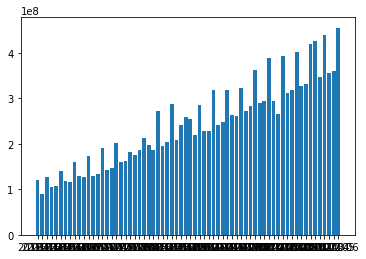

In [93]:
plt.bar(dff.index, dff['deferred_1M_US'])

In [94]:
dff.index

Index(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'],
      dtype='object', name='period')

In [95]:
df.columns


Index(['curr', 'BU', 'period', 'recognized_DC', 'recognized_US', 'service_DC',
       'service_US', 'deferred_B_DC', 'deferred_B_US', '_merge',
       'deferred_1M_DC', 'deferred_3M_DC', 'deferred_6M_DC', 'deferred_1Y_DC',
       'deferred_2Y_DC', 'deferred_3Y_DC', 'deferred_1M_US', 'deferred_3M_US',
       'deferred_6M_US', 'deferred_1Y_US', 'deferred_2Y_US', 'deferred_3Y_US',
       'Period_Weeks', 'is_forecast', 'r_squared', 'intercept', 'coeff',
       'X_length', 'book_1Y_DC', 'book_1Y_US'],
      dtype='object')

In [96]:
df['BU'].unique()

array(['Creative', 'DX Other', 'Document Cloud', 'Experience Cloud',
       'Print & Publishing'], dtype=object)

In [100]:
list_Q3 = ['2020-07', '2020-08', '2020-09']
this_BU = 'Creative'
test_Q3 = df[(df['BU']==this_BU) &
            (df['period'].isin(list_Q3))]

In [101]:
test_Q3['book_1Y_US'].sum()

53670198.69685685

In [102]:
list_Q4 = ['2020-10', '2020-11', '2020-12']
this_BU = 'Creative'
test_Q4 = df[(df['BU']==this_BU) &
            (df['period'].isin(list_Q4))]

In [103]:
test_Q4['book_1Y_US'].sum()

78502902.68514797